In [1]:
import pandas as pd
from vis import plot_missingness

In [2]:
def cartesian_product(df1, df2, output_csv_path=''):
    """
    Create a dataframe containing all possible combinations of rows from two input dataframes.

    Parameters:
    df1 (DataFrame): The first dataframe.
    df2 (DataFrame): The second dataframe.

    Returns:
    DataFrame: A dataframe containing all possible combinations of rows from df1 and df2.
    """
    # Add a temporary key to both dataframes to enable Cartesian product via merge
    df1['_key'] = 1
    df2['_key'] = 1

    # Perform a merge to create the Cartesian product
    result = pd.merge(df1, df2, on='_key').drop('_key', axis=1)

    # Remove the temporary key column
    df1.drop('_key', axis=1, inplace=True)
    df2.drop('_key', axis=1, inplace=True)

    # Output result csv if path given 
    if output_csv_path != '':
        result.to_csv(output_csv_path, index=False)

    return result

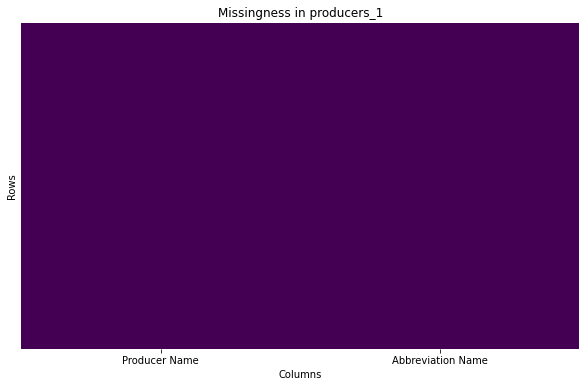

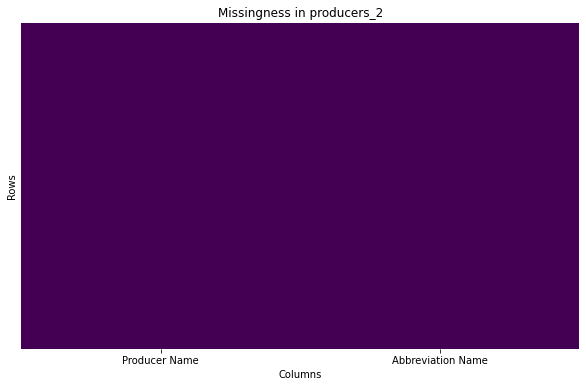

In [3]:
producers_1 = pd.read_csv('data/clean/ivorian-cocoa-coop-registry-2017.csv')
producers_2 = pd.read_csv('data/clean/cocoa-suppliers-compiled-from-importers.csv')

producers_1 = producers_1[['Producer Name', 'Abbreviation Name']]
producers_2 = producers_2[['Producer Name', 'Abbreviation Name']]
plot_missingness(producers_1, 'producers_1')
plot_missingness(producers_2, 'producers_2')

pairs shape: (1430462, 4)
pairs columns: Index(['Producer Name_x', 'Abbreviation Name_x', 'Producer Name_y',
       'Abbreviation Name_y'],
      dtype='object')


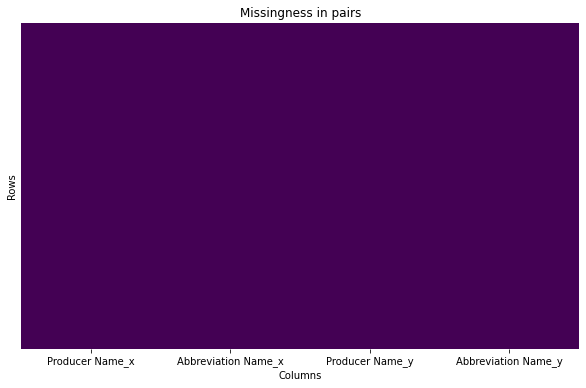

In [3]:
# pairs = cartesian_product(producers_1, producers_2, 'data/outputs/all_pairs.csv')
pairs = pd.read_csv('data/outputs/all_pairs.csv')
print(f'pairs shape: {pairs.shape}')
print(f'pairs columns: {pairs.columns}')
plot_missingness(pairs, 'pairs')

## Create Eval Set 


In [14]:
def generate_eval_template(
    processed_pairs, 
    metrics=['second_half_weighted_similarity', 'tf_idf_similarity_name'], 
    output_csv_path='data/outputs/eval_template.csv', 
    n=100):
    
    # Find the top n rows ranked by each metric.
    top_n = []
    for metric in metrics:
        # Get the top n rows ranked by metric
        top_n.append(processed_pairs.sort_values(by=metric, ascending=False).head(n))
        
    # Concatenate the DataFrames and drop duplicate rows
    combined_top_n = pd.concat(top_n)
    
    # Add a column 'classification' and fill it with all 0
    combined_top_n['classification'] = 0
    
    # Select only the producer name and abbreviated name columns
    result = combined_top_n[[
        'Producer Name_x', 
        'Producer Name_y', 
        'Abbreviation Name_x', 
        'Abbreviation Name_y',
        'Region_x',
        'Region_y',
        'classification'
    ]]
    
    result = result.drop_duplicates()
    
    # Write results to csv
    result.to_csv(output_csv_path, index=False)
    
    return result

processed_pairs = pd.read_csv('data/outputs/pair_similarity.csv')
eval_template = generate_eval_template(
    processed_pairs=processed_pairs,
    metrics=['second_half_weighted_similarity', 'tf_idf_similarity_name'], 
    output_csv_path='data/outputs/eval_template.csv',
    n=200
)

eval_template   

KeyError: "['Region_x', 'Region_y'] not in index"

In [12]:
eval_template = pd.read_csv('data/outputs/eval_template.csv')
eval_template

,Producer Name_x,Producer Name_y,Abbreviation Name_x,Abbreviation Name_y,classification
0,societe cooperative agricole de guitry,societe cooperative agricole de guitry,coop-ca socoagui,coop-ca-socoagui,0
1,societe cooperative agricole de guitry,societe cooperative agricole de guitry,coop-ca socoopgui,coop-ca-socoagui,0
2,societe cooperative agricole de guitry,societe cooperative agricole de guitry,socoopag coop-ca,coop-ca-socoagui,0
3,cooperative agricole siboulaka de beoua,cooperative agricole siboulaka de beoua,c.asi.b scoops,casib-scoops,0
4,societe cooperative agricole de bayota,societe cooperative agricole de bayota,socaba coop-ca,socaba,0
...,...,...,...,...,...
300,societe cooperative de meagui,societe cooperative agricole bekanti de meagui,scoops socom,cabm,0
301,societe cooperative agricole de youkou,societe cooperative agricole espoir de petit-g...,socayou,scaepgy,0
302,societe cooperative des exploitants agricoles ...,societe cooperative agricole de soubre,ceaso scoops,scasou-coop-ca,0
303,cooperative agricole la renaissance de gadouan,cooperative agricole la renaissance de vavoua,carega,careva,0
